# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Torero, William Klien)_: \
_Student No.2022-10739:\
_Section THV-TX-2:

### Submission Information

_Date and Time Submitted (most recent upload)_: September 18, 2024 6:00pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: William Klien B. Torero 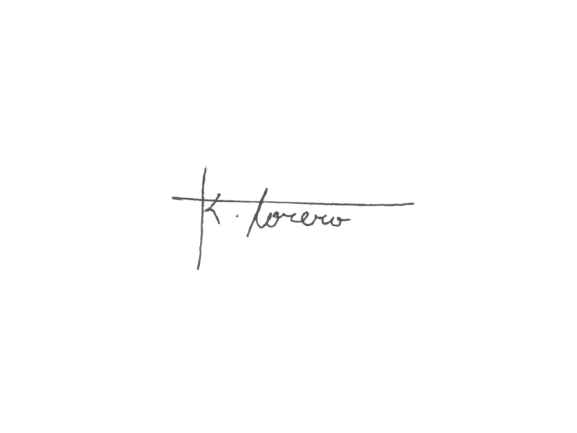

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [1]:
# Problem 1
# Use the Trapezoidal rule and Simpson's rule calculate a function
# We first define the variables that will be used
N_arr = ([10, 100, 1000]) ## Number of slices in the area under the curve
a = 0.0 # Lower limit of the integration
b = 5.0 # Upper limit of the integration
exact_value = 1450 # Exact answer of the integration with the given limits

# We also define the function that will be integrated
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5


# We then define the formula of Trapedoidal rule depending on the given parameters
def integ_trapezoidal(a, b, n):
  s = 0.5*f(a) + 0.5*f(b) # Terms in the formula of Trapezoidal rule
  h = (b-a)/n # Width of one slice of trapezoid

# We then make a loop for every value of k depending on the value of N, with n as a place holder
  for k in range(1,n):
   s += f(a+k*h) # Increment to the formula of Trapezoidal rule

  return h*s

# A for-loop is then created to apply the values of different values of N
for N in N_arr:
   t = integ_trapezoidal(a, b, N) # Setting t as variable for Trapedoizal rule
   percent_error = (t-exact_value)/exact_value # Percentage of the error depending on N
   print(N, t, percent_error)

# We then define the formula of Simpson's rule with the same parameters
def integ_simpsons(a, b, n):
  s = f(a) + f(b) # Terms in the formula of Simpson's rule
  h = (b-a)/n # Area of one slice of trapezoid

# Another loop is created for every value of k depending on the value of N, with n as a place holder
  for k in range(1, n, 2): # Odd values of k
   s += 4*f(a+k*h) # Increments to Simpson's rule
  for k in range(2, n, 2): # Even values of k
   s += 2*f(a+k*h) # Increment to Simpson's rule

  return 1/3*h*s

# Another loop is created applying the values of N
for N in N_arr:
   s = integ_simpsons(a, b, N) # Setting s as variable for Simpson's rule
   percent_error = (s-exact_value)/exact_value # Percentage of the error depending on N
   print(N, s, percent_error)

# Base on the percent error from each method, we can see that the Simpson's rule is a lot more accurate compare to Trapezoidal rule

10 1471.4375 0.01478448275862069
100 1450.2145812500003 0.00014798706896569988
1000 1450.0021458331234 1.4798849127240327e-06
10 1450.0833333333333 5.7471264367763824e-05
100 1450.0000083333337 5.747126657485657e-09
1000 1450.000000000834 5.75176994155707e-13


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [2]:
# Problem 2
# Import these specific functions from numpy library that will be used althroughout the code
from numpy import ones, copy, cos, tan, pi, linspace

# Defining the Gaussian quadrature function
def gaussxw(N):
  # Initial approximation to roots of the Legendre polynomial
  a = linspace(3,4*N-1,N)/(4*N+2) # We define 'a' as an array of N values spaced between the given values
                                  # The limits come from an approximation strategy for initializing the position of the roots of Legendre polynomials
  x = cos(pi*a+1/(8*N*N*tan(a))) # We define 'x' as a cosine approximation to initialize Gaussian quadrature points

  # Finding roots using Newton's method
  epsilon = 1e-15 # A value to control the accuracy of the iterations in finding the roots of Legendre polynomials
  delta = 1.0 # Initial value for the difference between the current and previous estimates of 'x'
  # A while-loop is then created until delta is smaller than specified precision epsilon to refine 'x'
  while delta > epsilon:
    p0 = ones(N,float) # This creates a new array filled with ones used as a starting point in the sequence to calculate Legendre polynomials
    p1 = copy(x) # This sets p1 to be copy of the most recent value of 'x' that will be used for the recursive calculation of Legendre polynomials
    # A for-loop is created to apply different values of N
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1) # Recurrence formula is then used to compute for higher-order Legendre polynomials
    dp = (N+1)*(p0-x*p1)/(1-x*x) # Derivative of Legendre polynomial to refine the roots of the polynomial
    dx = p1/dp # This represents the error of the current value of 'x'
    x -= dx # This adjusts the current value of 'x' to be closer to the actual root of the Legendre polynomial
    delta = max(abs(dx)) # This changes delta to be the maximun change in 'x' that stop the iteration process

  # Getting the weight value using 'x' and dp
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w

# Defining the function that will be integrated
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

N = 3 # Number of quadrature points
a = 0.0 # Lower limit of the integration
b = 5.0 # Upper limit of the integration

x,w = gaussxw(N) # Calls gaussxw function to get 'x' and 'w'
xp = 0.5*(b-a)*x + 0.5*(b+a) # Rescalled formula for quadrature points base on the given limits
wp = 0.5*(b-a)*w # Rescalled formula for weight base on the given limits

s = 0.0 # Initializing the variable 's' that will be used to get the result of Gaussian quadrature
# A for-loop is created to apply different values of N
for k in range (N):
  s += wp[k]*f(xp[k]) # Calculating the sum of using all values of k to get the estimation to the integral

print(s)

1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

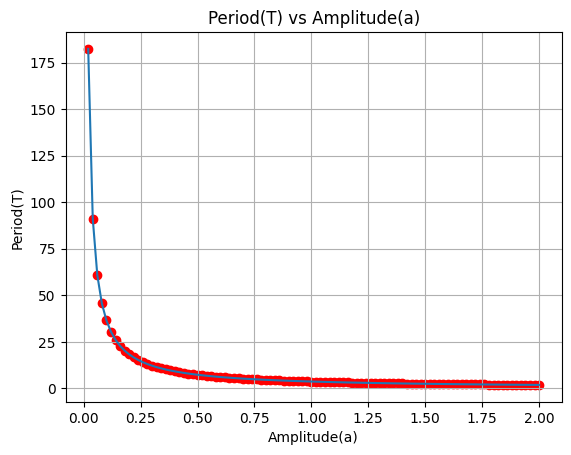

In [3]:
# Problem 3
# Importing the necessary libraries
from numpy import ones, copy, cos, tan, pi, linspace
import numpy as np
import matplotlib.pyplot as plt
import math

# Defining the Gaussian quadrature function
def gaussxw(N):
# Initial approximation to roots of the Legendre polynomial
  a = linspace(3,4*N-1,N)/(4*N+2) # We define 'a' as an array of N values spaced between the given values
                                  # The limits come from an approximation strategy for initializing the position of the roots of Legendre polynomials
  x = cos(pi*a+1/(8*N*N*tan(a))) # We define 'x' as a cosine approximation to initialize Gaussian quadrature points

  # Find roots using Newton's method
  epsilon = 1e-15 # A value to control the accuracy of the iterations in finding the roots of Legendre polynomials
  delta = 1.0 # Initial value for the difference between the current and previous estimates of 'x'
  # A while-loop is then created until delta is smaller than specified precision epsilon to refine 'x'
  while delta > epsilon:
    p0 = ones(N,float) # This creates a new array filled with ones used as a starting point in the sequence to calculate Legendre polynomials
    p1 = copy(x) # This sets p1 to be copy of the most recent value of 'x' that will be used for the recursive calculation of Legendre polynomials
    # A for-loop is created to apply different values of N
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1) # Recurrence formula is then used to compute for higher-order Legendre polynomials
    dp = (N+1)*(p0-x*p1)/(1-x*x) # Derivative of Legendre polynomial to refine the roots of the polynomial
    dx = p1/dp # This represents the error of the current value of 'x'
    x -= dx # This adjusts the current value of 'x' to be closer to the actual root of the Legendre polynomial
    delta = max(abs(dx)) # This changes delta to be the maximun change in 'x' that stop the iteration process

  # Getting the weight value using 'x' and dp
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w

# Defining the given potential function
def V(x):
  return x**4

N = 20 # Number for quadrature points
m = 1 # Given mass of the particle
a = 2.0 # The initial amplitude for the oscillations
        # Oscillation requires a non-zero amplitude becaue it represents how far a system moves from its equilibrium point hence a = 0.0 is not needed

# Defining the period function that will be integrated
def integ(x, a):
  return 1/math.sqrt(V(a)-V(x))

# Defining the function that will calculate the period T with the given amplitude using Gaussian quadrature
def T(a, N):
  x,w = gaussxw(N) # Calls gaussxw function to get 'x' and 'w'
  xp = 0.5*(a)*x + 0.5*(a) # Rescalled formula for quadrature points base on the given limits
  wp = 0.5*(a)*w # Rescalled formula for weight base on the given limits

  s = 0.0 # Initializing the variable 's' that will be used to get the result of Gaussian quadrature
  # A for-loop is created to apply different values of N
  for k in range (N):
    s += wp[k]*integ(xp[k],a) # Calculating the sum of using all values of k to get the estimation to the integral
  return math.sqrt(8*m)*s

N_graph = 100 # Number of points that will be used on the graph
a_plot = np.zeros(N_graph) # Array to store all the amplitude values
T_plot = np.zeros(N_graph) # Array to store all the period values

# Creating a for-loop
for i in range(N_graph):
  a_plot[i] = a/N_graph * (i + 1)
for i in range(N_graph):
  T_plot[i] = T(a_plot[i], N)

# Plotting the results
plt.plot(a_plot,T_plot)
plt.scatter(a_plot, T_plot, color='red')
plt.title("Period(T) vs Amplitude(a)")
plt.xlabel("Amplitude(a)")
plt.ylabel("Period(T)")
plt.grid()
plt.show()

# The graph shows a resemblance to the behavior of 1/x which validates our calculations
# The graph shows that period increases as amplitude increases
# This is because with larger movements of the amplitude, the force pulling the oscillator back becomes weaker
# Which leads to slower movement of the oscillator (increased amplitude) that takes more time to return (increased period) due to the potential (x**4)
